## 통계적 추정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [2]:
df = pd.read_csv('ch4_scores400.csv')
df.head()

,score
0,76
1,55
2,80
3,80
4,74


In [3]:
scores = np.array(df['score'])
df.shape

(400, 1)

In [28]:
# 모평균, 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
        0.002, 0.002, 0.002, 0.   , 0.002, 0.   , 0.   , 0.002, 0.002,
        0.003, 0.01 , 0.   , 0.017, 0.005, 0.013, 0.007, 0.015, 0.002,
        0.03 , 0.013, 0.03 , 0.008, 0.032, 0.01 , 0.038, 0.013, 0.032,
        0.027, 0.035, 0.012, 0.028, 0.017, 0.035, 0.017, 0.038, 0.017,
        0.025, 0.015, 0.015, 0.015, 0.012, 0.005, 0.022, 0.01 , 0.012,
        0.   , 0.012, 0.002, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ,  16.5,  18. ,  19.5,  21. ,  22.5,  24. ,  25.5,
         27. ,  28.5,  30. ,  31.5,  33. ,  34.5,  36. ,  37

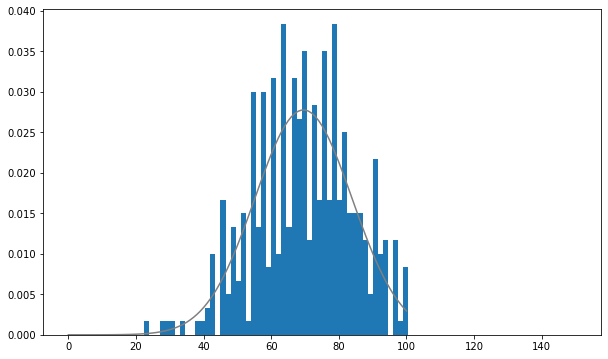

In [5]:
# 모집단이 정규분포를 이룬다고 가정하여 추정 수행

plt.figure(figsize = (10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))

plt.plot(xs, rv.pdf(xs), color = 'gray')
plt.hist(scores, bins=100, range=(0,150), density = True)

In [6]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np. random.choice(scores, (n_samples,n))

## 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [8]:
df = pd.read_csv('ch4_scores400.csv')
print('모평균 : ', df.score.mean())
np.random.seed(1111)
n = 20
n_samples = 10000
samples = np. random.choice(scores, (n_samples,n))

sample_mean = np.mean(samples, axis=1)

print('모분산 : ', df.score.var())

sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본평균, 분산 : ', np.mean(sample_mean), np.mean(sample_u_vars))

모평균 :  69.53
모분산 :  207.1870676691731
표본평균, 분산 :  69.53799999999998 206.67808263157895


In [18]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균 : {s_mean:.3f}')

1번째 표본평균 : 67.000
2번째 표본평균 : 72.850
3번째 표본평균 : 69.200
4번째 표본평균 : 64.450
5번째 표본평균 : 72.650


In [9]:
# 표본평균의 평균
# 추정량의 기댓값이 추측하려는 모수가 되는 성질을 '불편성'이라 하고 불편성을 가진 추정량을 '불편추정량'이라고 합니다.
# 표본평균의 기댓값이 모평균인 것을 대수의 법칙을 활용
# 모평균이 69.53, 표본평균의 기댓값은 모평균이 되는 것 같다. 
sample_mean = np.mean(samples, axis=1)
np.mean(sample_mean)

69.538

In [10]:
# 표본크기를 백만으로 할 때의 표본평균
# 표본 크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질, '일치성', 일치성을 가진 추정량 '일치추정량'
# 표본 크기를 증가시키면 표본평균은 모평균에 수렴한다.
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [33]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
s_mean

70.400

In [12]:
# 모분산
np.var(scores)

206.669

In [20]:
# 시행할 때마다 결과가 달라지는 표본분산
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산 : {s_var:.3f}')

1번째 표본분산 : 116.800
2번째 표본분산 : 162.928
3번째 표본분산 : 187.060
4번째 표본분산 : 149.148
5번째 표본분산 : 111.528


In [21]:
# 표본분산이 모분산의 불편추정량이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)
# 모분산 206.669에 비해 작은 값이 되었다. 표본분산은 모분산의 불편추정량이 아니다.

196.344

In [22]:
# 불편분산, 표본분산에서 나누는 수 n을 n-1로 하는 다음 식을 계산, 표본분산은 S제곱, 불편분산은 s제곱으로 나타냄
# n-1은 '자유도', 자유롭게 값을 취할 수 있는 변수의 개수
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)
# 불편분산은 모분산에 가까운 값이 되고 모분산의 불편 추정량이 되는 것 같다.

206.678

In [24]:
# 일치성 확인
# 모분산에 가까운 값이 되고 일치추정량이 된 것 같다.
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.128

In [13]:
# A학생의 표본으로 불편분산 계산
u_var = np.var(sample, ddof=1)
u_var

158.253

## 구간추정
- 모평균의 구간추정, 여기서는 모집단으로 정규분포를 가정, 더 나아가 그 모분산을 알고 있는 경우를 생각
- 표본평균은 N(뮤, 시그마제곱/n)을 땨른다.
- 추정량의 표준편차를 표준오차라고 한다.
- 확률변수가 0.975~0.025에 위치할 확률이 95%이다.
- 이를 신뢰구간이라고 하며, 신뢰구간의 하한과 상한을 신뢰상한, 신뢰하한이라고 한다.

In [34]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

In [37]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
s_mean

70.400

In [38]:
# 신뢰구간 계산, 신뢰수준 95%의 신뢰구간
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl,ucl#신뢰하한, 신뢰상한

(64.100, 76.700)

### 신뢰구간 해석
- 95%의 신뢰구간에 대한 바른 해석, 
```
동일한 방법으로 수차례 표본추출하여 구간추정을 하면, 그 중에 95%의 구간추정에는 모평군이 포함되어 있다.
```

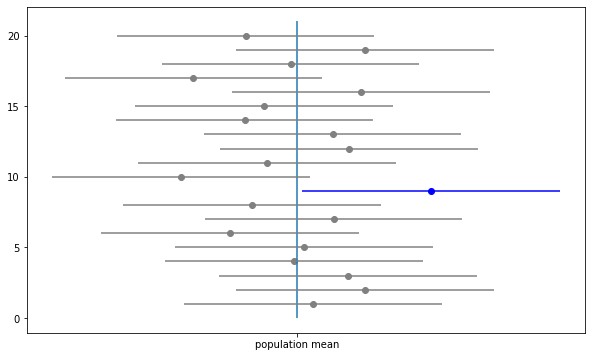

In [40]:
# 신뢰구간 그래프화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples=20
ax.vlines(p_mean,0,21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl,  color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl,  color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

# 20번 중 1번 모평균을 포함하지 않는 구간추정이 수행됨
# 이것이 95% 신뢰구간의 이미지

In [41]:
# 신뢰구간을 1만번 계산, 신뢰구간에 모평균이 포함된 것은 몇 %인지 계산
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025)*np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975)*np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt/len(samples)
# 신뢰구간의 약 95%가 모평균을 포함하고 있음을 확인

0.951

## 정규분포의 모분산 구간추정
- 불편분산을 변환하여 대표적인 확률분포를 따르는 확률변수를 생성해야함
- 이 때, 사용되는 확률분포가 카이제곱분포

In [43]:
# 만 개의 표본 데이터에서 Y의 표본 데이터를 생성
sample_y = sample_u_vars * (n-1)/p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

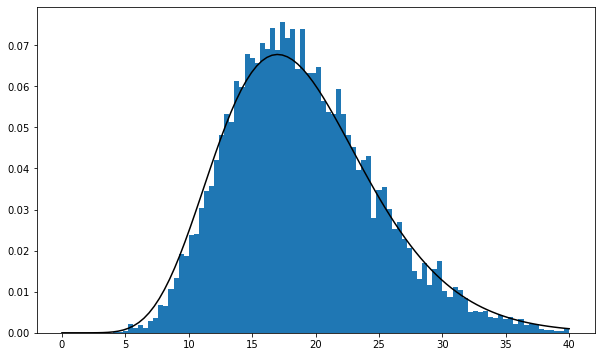

In [46]:
# Y의 표본데이터 히스토그램과 함께, 카이제곱(n-1)의 밀도함수를 그림
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,40,100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='black')
hist,_,_ = ax.hist(sample_y, bins =100, range=(0,40), density=True)

plt.show()
# 시험 점수의 분포가 정규분포와 깨끗하게 일치하지는 않지만 대략 카이제곱(n-1)과 일치한다고 말할 수 있다.

In [48]:
# 모분산의 구간추정
rv = stats.chi2(df=n-1)
lcl = (n-1)*u_var/rv.isf(0.025)
hcl = (n-1)*u_var/rv.isf(0.975)

lcl, hcl

(91.525, 337.596)

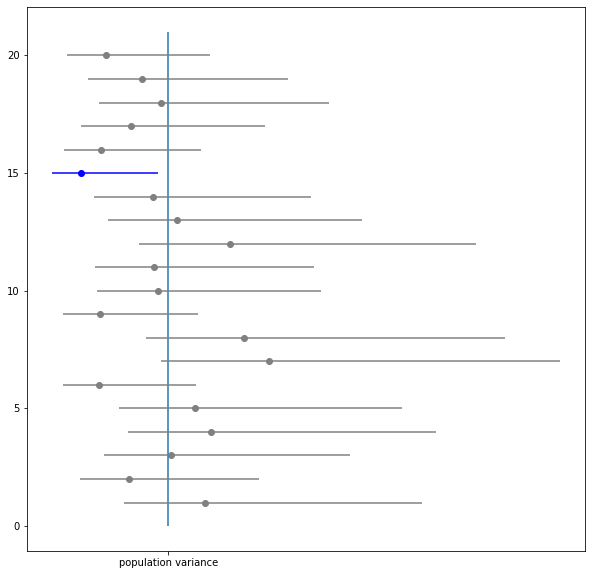

In [50]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1)*u_var_/rv.isf(0.025)
    ucl = (n-1)*u_var_/rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()
    

In [53]:
# 신뢰구간 1만번 계산
rv = stats.chi2(df=n-1)
cnt =0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1)*u_var_ / rv.isf(0.025)
    ucl = (n-1)*u_var_/rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
cnt/len(samples)

0.964

In [57]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
s_mean = np.mean(sample)
s_mean

70.400

In [58]:
# 모분산을 알지 못할 때, 모평균의 신뢰구간
# 이 상황에서는 모분산을 알 수 없어 기존 표준오차를 사용할 수 없다. 그 추정량인 불편분산을 사용한 표준오차를 사용한다.
# 이를 사용하면 확률변수는 자유도가 n-1인 t분포를 따른다.
# A학생의 표본 이용
# 모평균 69.53은 신뢰수준 95%의 신뢰구간 내에 포함된다. 
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025)*np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(u_var/n)

lcl,ucl

(63.739, 77.061)

## 베르누이 분포의 모평균 구간추정
- 2진 변수에는 베르누이 분포가 사용, 모집단 비율이 p라고 한다면 2진변수의 표본은 Bern(p)를 따르는 확률변수
- Bern(p)의 기댓값이 p가 되는 사실로부터 모집단의 비율 p는 모평균의 추정과 같은 구조, 이 추정을 모비율의 추정이라고 한다.

In [59]:
# 사용 데이터, '어느 기업이 출시한 상품 A를 알고 있는가?' 이 데이터를 통해 상품 A에 대한 국민 전체의 인지도 p를 조사하는 것이 목표
enquete_df = pd.read_csv('ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [64]:
# Bern(p)의 기댓값 p, 분산이 p(1-p)이므로 표본평균의 기댓값은 p, 분산은 p(1-p)/n

s_mean = np.mean(enquete)
s_mean
# A 상품의 인지도는 70.9%라고 할 수 있다.

0.709

In [66]:
# 모평균의 신뢰구간 추정

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.681, 0.737)

In [ ]:
# 포아송분포의 모평균 신뢰구간

In [67]:
n_access_df = pd.read_csv('ch10_access.csv')
n_access_df
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [68]:
s_mean = n_access.mean()
s_mean

10.444

In [69]:
# 모평균 람다의 신뢰구간

rv = stats.norm()
lcl = s_mean - rv.isf(0.025)*np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_mean/n)

lcl,ucl

(9.698, 11.191)

#### 과제_0905_1
p266~p291 예제 코드를 풀어보세요.

#### 과제_0905_2
- 다음 용어를 예를 들어 설명하세요.
  불편성, 일치성, 불편분산<br>
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.

## 통계적 가설검정

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
%precision 3
np.random.seed(1111)

In [8]:
# 감자튀김의 무게 데이터
df = pd.read_csv('ch11_potato.csv')
print(df.head())
print(len(df))

sample = np.array(df['무게'])

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05
14


In [9]:
# 표본평균
s_mean = np.mean(sample)
s_mean

128.451

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준


In [12]:
# 모평균이 알려진 감자튀김 무게 평균 130g보다 적은지 여부(모집단이 정규분포를 따르고 모분산은 9)
# 모평균 가설 130, 모분산 9 전제
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)
print(rv.mean(), rv.std(), '\n')
print(rv.rvs(10),'\n')
rv.isf(0.95)

130.0 0.8017837257372732 

[128.958 129.14  130.634 129.296 131.204 129.981 130.221 129.225 128.733
 129.837] 



128.681

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

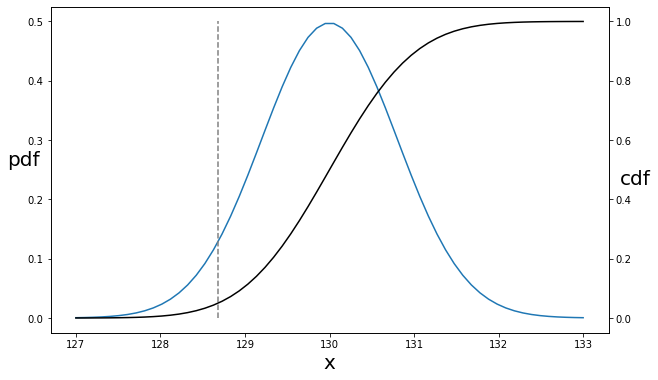

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
# x축을 공용으로 쓸 때
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)
ax1.set_ylim


In [14]:
# 검정통계량 z : 표본평균을 표준화
z = (s_mean - 130)/np.sqrt(9/14)
z

-1.932

In [15]:
# 임곗값
rv = stats.norm()
rv.isf(0.95)
# 검정통계량이 임곗값보다 적으므로 귀무가설 기각(모평균 130 기각)

-1.645

In [16]:
# 검정통계량으로부터 p값을 산출, 유의수준은 0.05
# 누적분포함수에 z를 넣어줌
# 유의수준보다 p값이 적으므로 귀무가설은 기각됨, 대립가설 채택
rv.cdf(z)

0.027

### 단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다.
- 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행


In [17]:
z = (s_mean - 130)/np.sqrt(9/14)
z

-1.932

In [18]:
rv = stats.norm()
rv.interval(0.95)
# 양측검정일 경우 임계값은 표준정규분포 95% 구간에 따라 구함
# 임곗값과 검정통계량을 비교해보면 검정통계량이 채택역에 들어감.

(-1.960, 1.960)

In [19]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값을 구했을 때,유의수준 0.05보다 크므로 귀무가설을 채택한다. (모평균은 130이 아니라고 말할 수 없다.)
rv.cdf(z)*2

0.053

#### 가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


In [48]:
#평균이 130, 표준편차가 3, 실제로 평균은 130인 상황을 고려 N(130,9)
rv = stats.norm(130,3)

In [49]:
# 1종 오류를 범할 비율
c = stats.norm().isf(0.95)
print('임곗값 :', c)
n_samples = 10000
cnt =0
for _ in range(n_samples):
    sample_ = rv.rvs(14)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130)/np.sqrt(9/14)
    if z < c: #검정통계량 < 임계값
        cnt += 1
cnt/n_samples
# 대략 5%의 비율로 130보다 작다라고 잘못 탐지(오탐)함
# 제 1종 오류를 범하는 확률을 '위험률'이라 부르고 기호는 알파임
# 위험률은 '유의수준'과 '일치'하므로 분석가가 제어할 수 있는 확률

임곗값 : -1.6448536269514722


0.049

In [50]:
rv = stats.norm(128,3)

In [51]:
# 2종 오류를 범할 비율 >> 베타
# 실제로 모평균이 130보다 작다 인데, 모평균은 130보다 작다 라는 결론을 얻을 수 없는 상황 >> 미탐
# 1 - 베타 = 검정력, 분석가가 제어할 수 없는 확률
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130)/np.sqrt(9/14)
    if z >= c:#검정통계량 >= 임계값
        cnt += 1
cnt/n_samples

0.202

#### 카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.


In [6]:
import pandas as pd
import numpy as np
ad_df = pd.read_csv('ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [7]:
# 교차집계표(분할표) 작성, pandas crosstab으로 작성
ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [8]:
ad_cross['했다']/(ad_cross['했다']+ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

In [9]:
n_not, n_yes = ad_cross.sum()
n_not,n_yes

(900, 100)

In [10]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [11]:
# 기대도수 구하기
ad_ef = pd.DataFrame({'했다':[n_adA*n_yes/n, 
                           n_adB*n_yes/n],'하지 않았다':[n_adA*n_not/n, 
                                                   n_adB*n_not/n]},
                    index=['A','B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [17]:
from scipy import stats
rv=stats.chi2(9)
1-rv.cdf(0.05)

0.9999999988439061

In [59]:
# 기대도수와 관측도수의 차이를 측정함으로써 검정 수행
# 검정 통계량 구하기
y = ((ad_cross - ad_ef)**2/ad_ef).sum().sum()
y

3.750

In [60]:
# p값 구하기
# 귀무가설은 채택되고 광고A와 광고B에 유의한 차이가 인정되지 않는다.
rv = stats.chi2(1)
1-rv.cdf(y)

0.053

In [61]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(3.750, 0.053, 1)

In [62]:
ef

array([[360.,  40.],
       [540.,  60.]])

#### 과제_0907_1
p308 ~ 331 예제 풀기(윌콕슨, 만위트니는 제외)

#### 과제_0907_2
- 카이제곱 검정을 수행하여 독립성 검정을 수행하는 사례를 작성하여 설명하세요.

In [ ]:
# 시험 20문제, 3시간 시험, 오픈북
# 기술통계,표준화, 이상치 찾기,제거,상관관계(회귀직선, 히트맵), 히스토그램 그리기, 이산확률분포, 연속형확률분포, 정규분포(파라미터, 특정확률에 대한 확률분포값, 확률구하기), 분석 전처리(지침에 따라), 교차분석표(교차집계표), 독립성 검정
# 분석라이브러리 관련 문제, 통계에 필요한 문제들, 각 분포, 합의분포, 표본평균의 분포(중심극한정리) 중요, 시각화 필수(ㅉ;ㅣㅇ긋), 
# 추측통계 근간 : 중심극한정리, 대수의 법칙
# 가설과 검정, 유의성 검정

#### 시험범위 : p336까지